## 머신러닝
# 결정트리 (Decision Tree)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import graphviz

### 유방암 데이터

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
cancer.target_names # malignant(악성): 0, benign(양성): 1

array(['malignant', 'benign'], dtype='<U9')

In [10]:
np.bincount(cancer.target)

array([212, 357], dtype=int64)

### 해결하려는 문제는 무엇인가?
> 처음 두 속성인 mean radius와 mean texture를 이용해 malignant(악성)과 benign(양성)을 분류하고 싶다

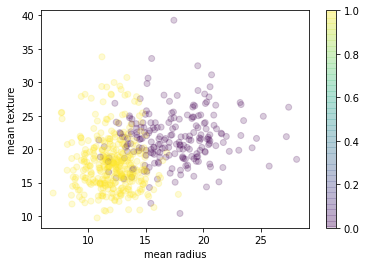

In [12]:
plt.scatter(cancer.data[:,0], cancer.data[:,1], c=cancer.target, alpha=0.2)
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.colorbar()

### DecisionTreeClassifier

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [14]:
# 속성을 2개로 제한
X_train = X_train[:, :2]
X_test = X_test[:, :2]
X_train.shape, X_test.shape

((426, 2), (143, 2))

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

1.0 0.8741258741258742


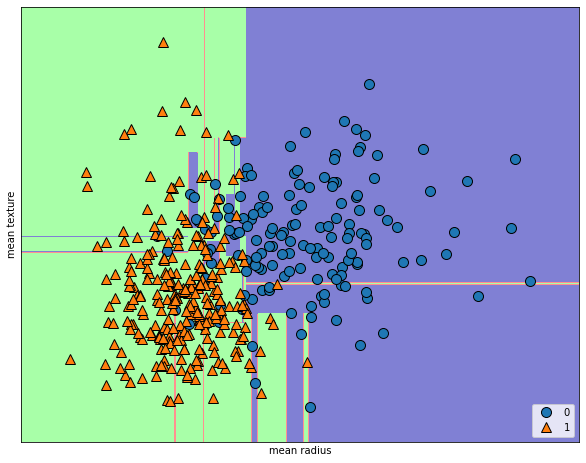

In [17]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)

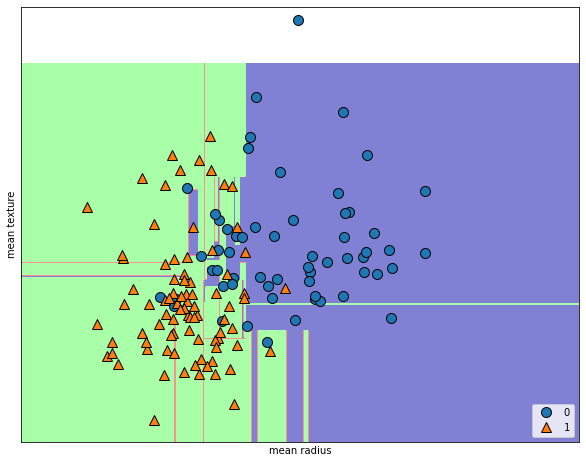

In [18]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)

### 트리 그래프 그리기
1. 아나콘다 프롬프터에서, "pip install graphviz" 실행
2. http://www.graphviz.org 에서 "graphviz-3.0.0 (64-bit) EXE installer" 다운로드 및 설치
> 설치시, PATH 에 추가 옵션 설정 (설정시 아래 3번은 자동으로 처리됨)
3. "C:\Program Files\Graphviz\bin" 을 윈도우 PATH 에 추가
4. 기존에 떠 있던 아나콘다 프롬프트를 모두 닫고 jupyter notebook 재실행

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names[:2], impurity=False, filled=True)

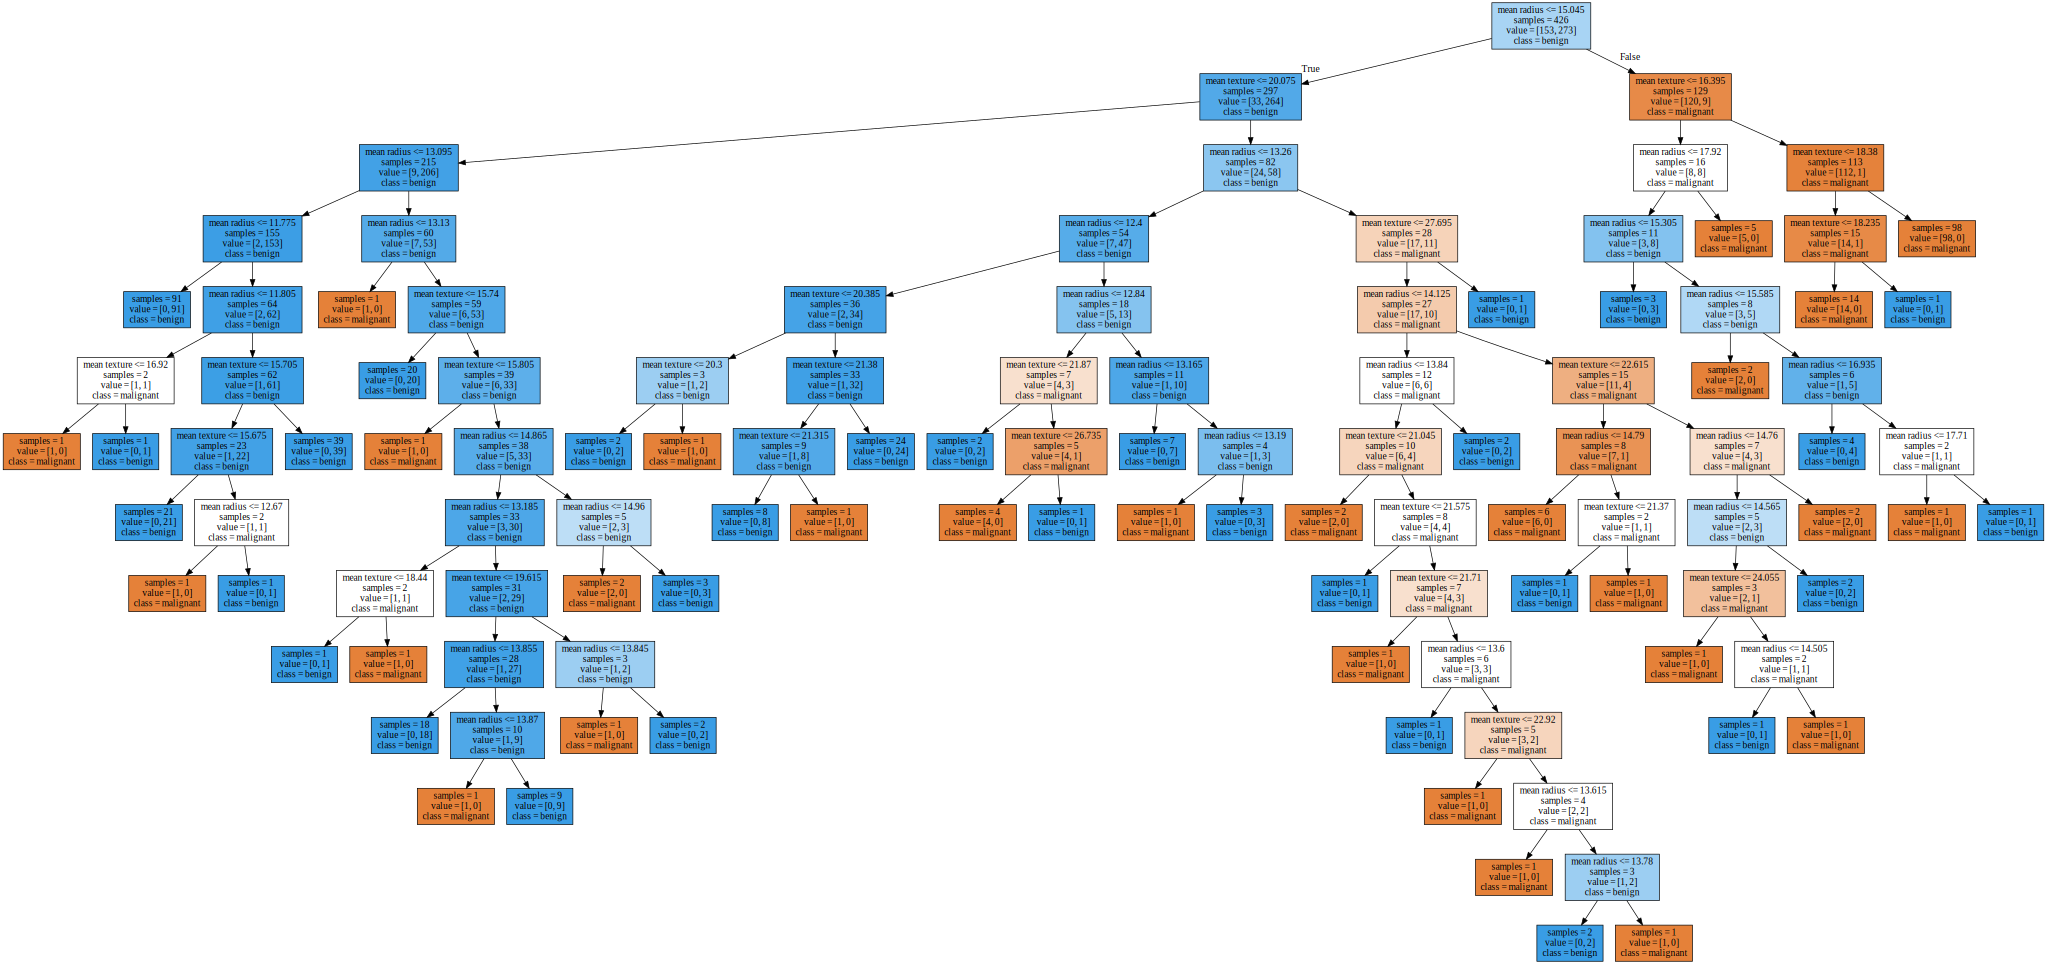

In [20]:
import graphviz

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [21]:
## 파일로 저장
dot=graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='tree')

'tree.png'

> - 학습데이터에 대한 정확도가 100% 인 이유는 무엇인가?
> - 위의 결과는 과적합인가?

### max_depth 옵션
- 나무의 크기를 제한한다

In [22]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.9014084507042254 0.8601398601398601


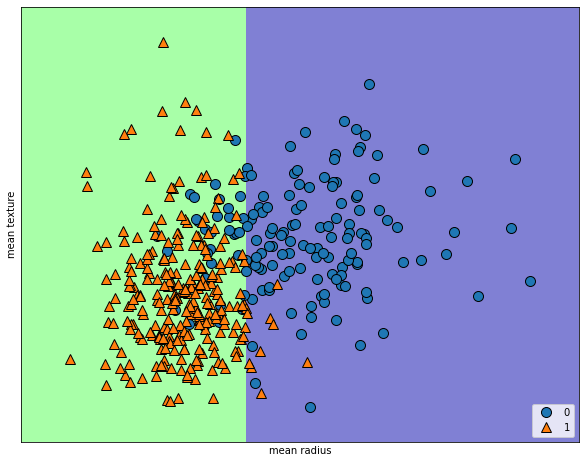

In [23]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)

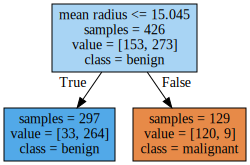

In [24]:
export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names[:2], impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [25]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.9014084507042254 0.8601398601398601


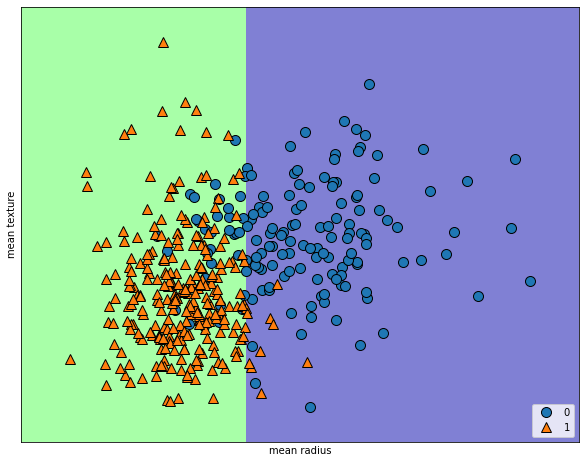

In [26]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)

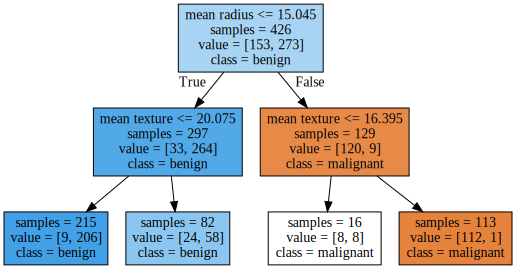

In [27]:
export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names[:2], impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [28]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.9272300469483568 0.8741258741258742


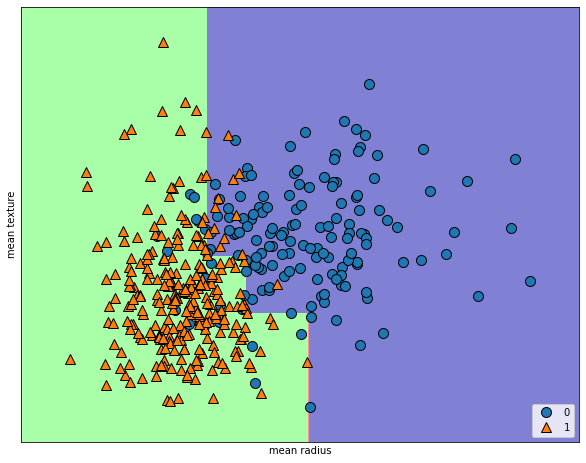

In [29]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)

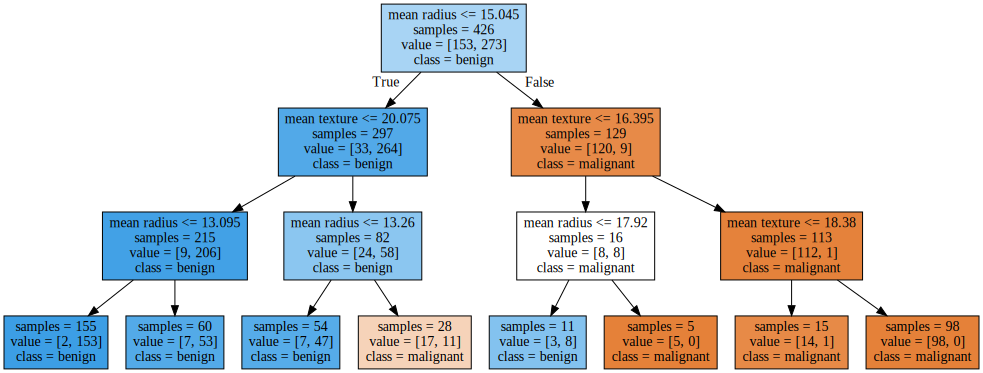

In [30]:
export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names[:2], impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

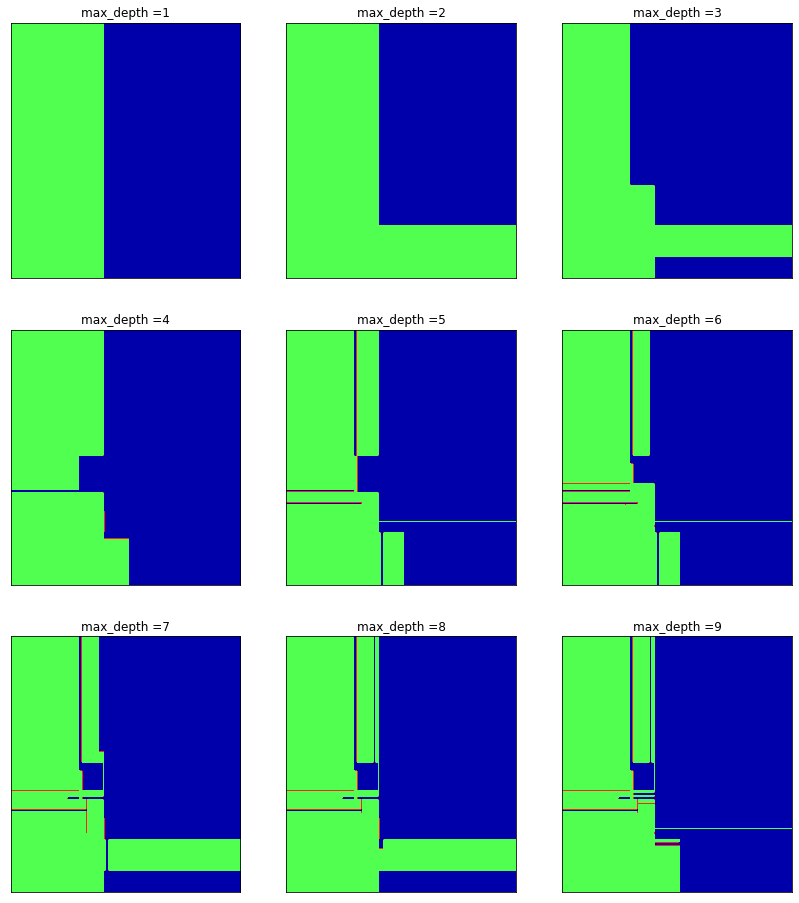

In [31]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data[:,:2], cancer.target)

plt.figure(figsize=[14,16])
for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=2020)
    model.fit(X_train, y_train)
    
    plt.subplot(3,3,depth)
    plt.title('max_depth ='+str(depth))
    mglearn.plots.plot_2d_classification(model, X_train)
    #mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, alpha=0.3)

### 전체 속성 사용

In [32]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [33]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.9929577464788732 0.951048951048951


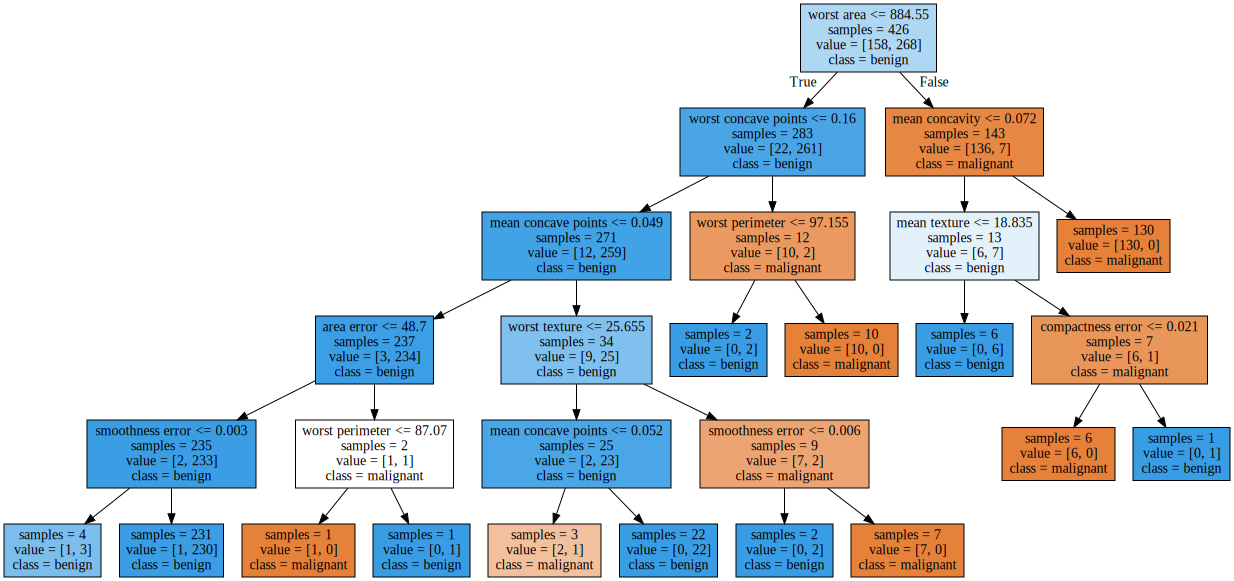

In [34]:
export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### DecisionTreeClassifier 주요 옵션
- max_depth
- max_leaf_nodes : 총 잎노드의 갯수를 제한한다
- min_samples_split : 만일 10이라면, 노드의 샘플 갯수가 10이상이 되어야 분기를 한다.
- min_samples_leaf : 10이라면, 잎노드의 샘플 갯수는 10이상이 되도록 만든다.
- max_features : 분기를 할 때 고려하는 속성의 갯수이다. 만일 2라면 판단할 속성을 고를때 랜덤하게 속성 2개만 뽑아 그 중에서 기준을 세운다.

In [53]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [35]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [36]:
model = DecisionTreeClassifier(max_leaf_nodes=5)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

0.960093896713615 0.951048951048951


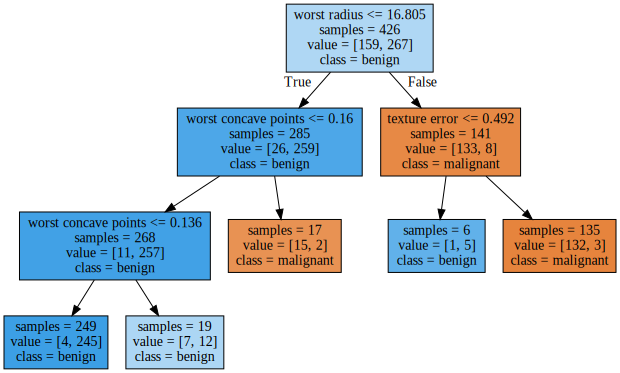

In [37]:
export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 엔트로피
- 결정트리는 가장 잘 나누는 속성을 선택하고 경계값을 결정하기 위해 **엔트로피(entropy)** 라는 개념을 사용
- 엔트로피를 최대한 낮추는 것이 목표임
- 결정트리에서는 특정속성과 그것의 특정기준값으로 나누었을때, 엔트로피가 최소가 되는 속성과 기준값을 찾아내는 과정이다. 모든 속성과 모든 기준값을 검토해야 하므로 연산량이 아주 클 수 밖에 없다.
> $ E_{org} = - (p_1 log{p_1} + p_2 log{p_2}) $ <br>
> $ E_{new} = - {N_1 \over N} (p_{11} log{p_{11}} + p_{12} log{p_{12}}) - {N_2 \over N} (p_{21} log{p_{21}} + p_{22} log{p_{22}}) $ <br>
> $ E_{new} < E_{org} $ <br>
> 위의 시도를 무수히 반복했을 때.. <br>
> $ E_{new} = min_i(E_{new\_i}) $
- 
- 엔트로피는 **복잡도**로 해석하면 편하다. 복잡도를 줄이는 것이 머신러닝의 목표와 부합한다.
- 신경망에서는 엔트로피를 오차로 보고, 이를 줄이기 위해 경사하강법을 사용한다.
- 신경망에서의 엔트로피(오차) 계산식을 간단히 표현하면 아래와 같다.
> $ Entropy = -\ log(\hat{y}) $ , (여기서 $\hat{y}$ 는 해당 클래스에 대한 예측확률값이다)